# 한글 자연어 처리

In [1]:
# IPython 매직 명령
%matplotlib inline

# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
# font_path = "c:\\Windows\\Fonts\\malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path ).get_name()
# rc( 'font', family = font_name )

# Mac OS 사용시 matplotlib 한글 폰트 사용 설정
rc( 'font', family = 'AppleGothic' )

import warnings
warnings.filterwarnings( 'ignore' )

In [4]:
import json
import glob # 경로와 이름을 지정하여 파일을 다루는 파일 처리 작업을 위한 모듈
import re # 정규표현식 모듈

from functools import reduce # 2차원 리스트를 1차원 리스트로 차원을 축소하는 모듈
from collections import Counter # 데이터 집합에서 개수를 자동으로 계산하는 모듈

import nltk
from nltk.tokenize import word_tokenize # 단어 토큰화 모듈
from nltk.corpus import stopwords # 불용어 처리 모듈
from nltk.stem import WordNetLemmatizer # 표제어 추출 모듈

from konlpy.tag import Okt

from wordcloud import STOPWORDS, WordCloud

## 데이터 수집

### json 파일 내용 읽기

In [3]:
filename = '../data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
data = json.loads( open( filename + '.json', 'r', encoding = 'utf-8'
                       ).read() )
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

### message 내용 추출

In [6]:
message = ''
for item in data:
    if 'message' in item.keys():
        # [^\w] : 문자나 숫자가 아닌것은 제외
        message = message + re.sub( r'[^\w]', ' ', item[ 'message' ] ) + ''
message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

### 형태소 분석기를 이용한 형태소 분석

In [7]:
nlp = Okt() # Okt 형태소 분석기 객체 생성
message_n = nlp.nouns( message ) # 형태소 분석기를 이용하여 명사만 추출
message_n

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

## 데이터 탐색

### 단어별 빈도수 계산

In [9]:
count = Counter( message_n )
count

Counter({'스파크': 3,
         '포럼': 5,
         '미래': 3,
         '시대': 7,
         '조직': 4,
         '변화': 3,
         '시작': 1,
         '현': 1,
         '사회': 3,
         '문제': 1,
         '및': 1,
         '이슈': 2,
         '제기': 1,
         '그': 1,
         '혁신': 1,
         '해결': 1,
         '소셜': 2,
         '이노': 1,
         '베이': 1,
         '터': 4,
         '발굴': 1,
         '지원': 1,
         '우리': 2,
         '확산': 1,
         '위해': 2,
         '도전': 1,
         '만남': 1,
         '자리': 1,
         '차': 23,
         '산업혁명': 22,
         '기업': 3,
         '직문': 1,
         '실험': 1,
         '사례': 2,
         '통해': 4,
         '방향': 1,
         '생각': 1,
         '로봇': 3,
         '주요': 2,
         '성장': 1,
         '동력': 1,
         '국내': 2,
         '재': 1,
         '평가': 1,
         '분석': 1,
         '금융': 1,
         '산업': 10,
         '전반': 1,
         '점검': 1,
         '공통': 1,
         '간판': 1,
         '공약': 1,
         '선도': 1,
         '도시': 1,
         '구현': 1,
         '

In [10]:
word_count = dict()
# 단어 출현 빈도가 많은 상위 80개중 단어 길이가 1이상인 단어 추출
for tag, count in count.most_common( 80 ):
    if ( len( str( tag ) ) > 1 ):
        word_count[ tag ] = count
        print( f'{tag}: {count}' )

산업혁명: 22
전자신문: 13
산업: 10
직업: 10
기술: 8
시대: 7
라이브: 7
이번: 6
진흥: 6
포럼: 5
일자리: 5
조직: 4
통해: 4
진행: 4
스파크: 3
미래: 3
변화: 3
사회: 3
기업: 3
로봇: 3
노력: 3
서울: 3
시간: 3
방송: 3
대응: 3
주형: 3
전자: 3
정보: 3
이슈: 2
소셜: 2
우리: 2
위해: 2
사례: 2
주요: 2
국내: 2
활용: 2
과정: 2
빅데이터: 2
흐름: 2
최고: 2
서비스: 2
영국: 2
한국: 2
경쟁력: 2
교육: 2
만구: 2
지윤: 2
윤석: 2
테스트: 2
웍스: 2
대표: 2
시청: 2
현장: 2
소프트웨어: 2
테스: 2
가장: 2
과제: 2
대표이사: 2
공공기관: 2
중소기업: 2
모시: 2
국정: 2
컨퍼런스: 2
행사: 2
페이스북: 2
대비: 2
시작: 1
문제: 1


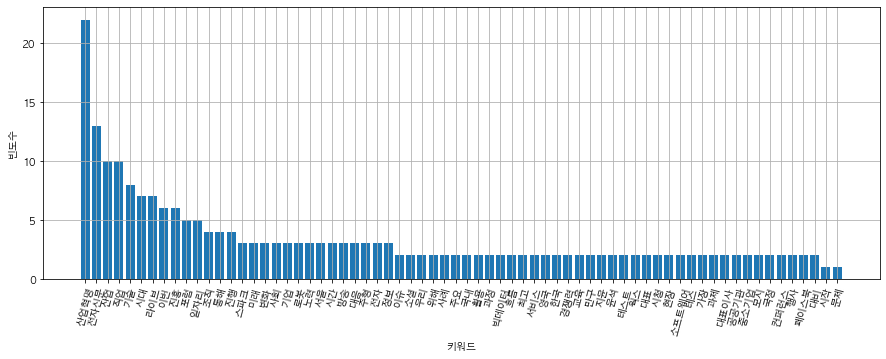

In [11]:
plt.figure( figsize = ( 15, 5 ) )
plt.xlabel( '키워드' )
plt.ylabel( '빈도수' )
plt.grid( True )

sorted_keys = sorted( word_count, key = word_count.get, reverse = True )
sorted_values = sorted( word_count.values(), reverse = True )
plt.bar( range( len( word_count ) ), sorted_values, align = 'center' )
plt.xticks( range( len( word_count ) ), list( sorted_keys ), rotation = '75' )
plt.show()

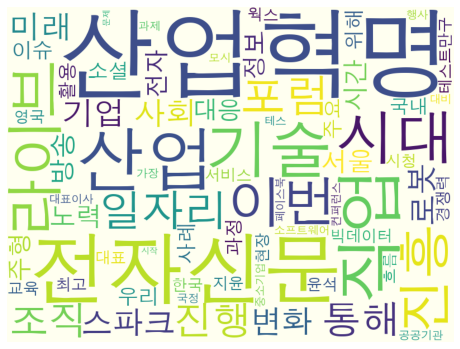

In [13]:
# Windows font 설정 : 'C:\\Windos\\Fonts\\malgun.ttf'
wc = WordCloud( font_path = '/Library/Fonts/AppleGothic.ttf',
                background_color = 'ivory', width = 800, height = 600 )
cloud = wc.generate_from_frequencies( word_count )
plt.figure( figsize = ( 8, 8 ) )
plt.imshow( cloud )
plt.axis( 'off' )
plt.show()

In [15]:
cloud.to_file( 'word_cloud.jpg' )

# Web Crawling

In [16]:
!conda list BeautifulSoup

# packages in environment at /Users/imac4.5k-r.g./opt/anaconda3:
#
# Name                    Version                   Build  Channel
beautifulsoup4            4.6.0                    pypi_0    pypi


In [17]:
!conda list selenium

# packages in environment at /Users/imac4.5k-r.g./opt/anaconda3:
#
# Name                    Version                   Build  Channel
selenium                  3.141.0         py38h1de35cc_1001  


## webbrowser 모듈을 이용한 웹 사이트 접속

In [18]:
import webbrowser

In [19]:
url = 'https://www.naver.com'
webbrowser.open( url )

True

In [22]:
naver_search_url = 'https://search.naver.com/search.naver?query='
search_word = 'python'
url = naver_search_url + search_word
webbrowser.open_new( url )

True

In [23]:
google_search_url = 'https://www.google.com?q='
search_word = 'python'
url = google_search_url + search_word
webbrowser.open_new( url )

True

## 정적 웹 크롤링

### HTML 구조 이해

In [58]:
%%writefile HTML_example.html
<!doctype html>
<html>
    <head>
        <title>HTML example</title>
        <style>
            h1, p, div { text-align: center; }
        </style>
    </head>
    <body>
        <h1>HTML Example</h1>
        <hr>
        <p id="name">이름 : 홍길동</p>
        <p id="kor" class="subject">국어 : 50</p>
        <p id="eng" class="subject">영어 : 50</p>
        <p id="math" class="subject">수학 : 50</p>
        <p id="total">총점 : 150</p>
        <p id="average">평균 : 50.0</p>
        <hr>
        <div id="link">
            <a href=https://www.naver.com>Naver</a>
            <a href=https://www.google.com>Google</a>
        </div>
    </body>
</html>

Overwriting HTML_example.html


### 웹 페이지 소스 제어

#### web server로 부터 web page 소스( html ) 수신

In [25]:
import requests

In [29]:
r = requests.get( 'https://www.google.com' ) # web page 소스( html 코드 )를 가져오는 함수
r

<Response [200]>

In [27]:
r.text[ :100 ] # 가져온 html 코드 

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content'

#### HTML 소스 코드 분석

In [30]:
from bs4 import BeautifulSoup

In [52]:
html = '''<!doctype html><html><head><title>HTML example</title><style>h1, p, div { text-align: center; }
</style></head><body><h1>HTML Example</h1><hr>
<p id="name">이름 : 홍길동</p>
<p id="kor" class="subject">국어 : 50</p>
<p id="eng" class="subject">영어 : 50</p>
<p id="math" class="subject">수학 : 50</p>
<p id="total">총점 : 150</p>
<p id="average">평균 : 50.0</p><hr>
<div id="link"><a href=https://www.naver.com>Naver</a>
<a href=https://www.google.com>Google</a></div></body></html>
'''

In [54]:
# 분석할 대상 html 파싱( parsing )
soup = BeautifulSoup( html, 'lxml' ) # 'lxml' : html 파서( parser )
soup

<!DOCTYPE html>
<html><head><title>HTML example</title><style>h1, p, div { text-align: center; }
</style></head><body><h1>HTML Example</h1><hr/>
<p id="name">이름 : 홍길동</p>
<p class="subject" id="kor">국어 : 50</p>
<p class="subject" id="eng">영어 : 50</p>
<p class="subject" id="math">수학 : 50</p>
<p id="total">총점 : 150</p>
<p id="average">평균 : 50.0</p><hr/>
<div id="link"><a href="https://www.naver.com">Naver</a>
<a href="https://www.google.com">Google</a></div></body></html>

In [35]:
print( soup.prettify() ) # html 형태로 표현

<!DOCTYPE html>
<html>
 <head>
  <title>
   HTML example
  </title>
  <style>
   h1, p, div { text-align: center; }
  </style>
 </head>
 <body>
  <h1>
   HTML Example
  </h1>
  <hr/>
  <p id="name">
   이름 : 홍길동
  </p>
  <p id="kor">
   국어 : 50
  </p>
  <p id="eng">
   영어 : 50
  </p>
  <p id="math">
   수학 : 50
  </p>
  <p id="total">
   총점 : 150
  </p>
  <p id="average">
   평균 : 50.0
  </p>
  <hr/>
  <div id="link">
   <a href="https://www.naver.com">
    Naver
   </a>
   <a href="https://www.google.com">
    Google
   </a>
  </div>
 </body>
</html>



In [36]:
soup.find( 'p' ) # p 태그 첫 번째 항목 검색

<p id="name">이름 : 홍길동</p>

In [37]:
soup.find( 'p' ).get_text() # p 태그 첫 번째 항목 검색 결과에서 text 반환

'이름 : 홍길동'

In [38]:
soup.find( 'a' ) 

<a href="https://www.naver.com">Naver</a>

In [39]:
soup.find( 'a' ).get_text()

'Naver'

In [40]:
soup.find_all( 'p' ) # p 태그 전체 검색

[<p id="name">이름 : 홍길동</p>,
 <p id="kor">국어 : 50</p>,
 <p id="eng">영어 : 50</p>,
 <p id="math">수학 : 50</p>,
 <p id="total">총점 : 150</p>,
 <p id="average">평균 : 50.0</p>]

In [43]:
students = soup.find_all( 'p' )
for student in students:
    print( student.get_text() )

이름 : 홍길동
국어 : 50
영어 : 50
수학 : 50
총점 : 150
평균 : 50.0


In [46]:
soup.title # title 태그 정보

<title>HTML example</title>

In [47]:
soup.body # body 태그 정보

<body><h1>HTML Example</h1><hr/><p id="name">이름 : 홍길동</p>
<p id="kor">국어 : 50</p><p id="eng">영어 : 50</p><p id="math">수학 : 50</p>
<p id="total">총점 : 150</p><p id="average">평균 : 50.0</p><hr/>
<div id="link"><a href="https://www.naver.com">Naver</a>
<a href="https://www.google.com">Google</a></div></body>

In [48]:
soup.body.p

<p id="name">이름 : 홍길동</p>

In [49]:
soup.body.h1

<h1>HTML Example</h1>

In [50]:
soup.find( 'p', { 'id': 'kor' } ) # p 태그의 id 속성( attribute )의 정보

<p id="kor">국어 : 50</p>

In [51]:
soup.find( 'p', { 'id': 'name' } )

<p id="name">이름 : 홍길동</p>

In [56]:
soup.find_all( 'p', { 'class': 'subject' } )

[<p class="subject" id="kor">국어 : 50</p>,
 <p class="subject" id="eng">영어 : 50</p>,
 <p class="subject" id="math">수학 : 50</p>]

In [57]:
soup.find_all( 'p' )

[<p id="name">이름 : 홍길동</p>,
 <p class="subject" id="kor">국어 : 50</p>,
 <p class="subject" id="eng">영어 : 50</p>,
 <p class="subject" id="math">수학 : 50</p>,
 <p id="total">총점 : 150</p>,
 <p id="average">평균 : 50.0</p>]

In [60]:
subjects = soup.find_all( 'p', { 'class': 'subject' } )
for subject in subjects:
    print( subject.get_text() )

국어 : 50
영어 : 50
수학 : 50


#### CSS 선택자 사용

In [61]:
soup.select( 'body h1' ) # select() 메서드 : CSS 선택자를 적용한 내용 반환

[<h1>HTML Example</h1>]

In [62]:
soup.select( 'body p' )

[<p id="name">이름 : 홍길동</p>,
 <p class="subject" id="kor">국어 : 50</p>,
 <p class="subject" id="eng">영어 : 50</p>,
 <p class="subject" id="math">수학 : 50</p>,
 <p id="total">총점 : 150</p>,
 <p id="average">평균 : 50.0</p>]

In [66]:
soup.select( 'p#kor' ) # p태그의 id 속성에 대한 내용

[<p class="subject" id="kor">국어 : 50</p>]

In [67]:
soup.select( 'p.subject' ) # p태그의 class 속성에 대한 내용

[<p class="subject" id="kor">국어 : 50</p>,
 <p class="subject" id="eng">영어 : 50</p>,
 <p class="subject" id="math">수학 : 50</p>]

In [70]:
for subject in soup.select( 'p.subject' ):
    print( subject.get_text() )

국어 : 50
영어 : 50
수학 : 50


In [68]:
soup.select( 'a' )

[<a href="https://www.naver.com">Naver</a>,
 <a href="https://www.google.com">Google</a>]

### 정적 웹 사이트 크롤링

https://www.alexa.com/topsites

In [71]:
import requests
from bs4 import BeautifulSoup

In [72]:
url = 'https://www.alexa.com/topsites'

html_website_ranking = requests.get( url ).text
soup_website_ranking = BeautifulSoup( html_website_ranking, 'lxml' )

In [73]:
website_ranking = soup_website_ranking.select( 'p a' )
website_ranking

[<a href="https://support.alexa.com/hc/en-us/articles/200444340" target="_blank">this explanation</a>,
 <a href="/siteinfo/google.com">Google.com</a>,
 <a href="/siteinfo/youtube.com">Youtube.com</a>,
 <a href="/siteinfo/tmall.com">Tmall.com</a>,
 <a href="/siteinfo/facebook.com">Facebook.com</a>,
 <a href="/siteinfo/qq.com">Qq.com</a>,
 <a href="/siteinfo/baidu.com">Baidu.com</a>,
 <a href="/siteinfo/sohu.com">Sohu.com</a>,
 <a href="/siteinfo/taobao.com">Taobao.com</a>,
 <a href="/siteinfo/360.cn">360.cn</a>,
 <a href="/siteinfo/jd.com">Jd.com</a>,
 <a href="/siteinfo/amazon.com">Amazon.com</a>,
 <a href="/siteinfo/yahoo.com">Yahoo.com</a>,
 <a href="/siteinfo/wikipedia.org">Wikipedia.org</a>,
 <a href="/siteinfo/weibo.com">Weibo.com</a>,
 <a href="/siteinfo/sina.com.cn">Sina.com.cn</a>,
 <a href="/siteinfo/xinhuanet.com">Xinhuanet.com</a>,
 <a href="/siteinfo/zoom.us">Zoom.us</a>,
 <a href="/siteinfo/live.com">Live.com</a>,
 <a href="/siteinfo/netflix.com">Netflix.com</a>,
 <a href=

In [74]:
website_ranking[ 1 ].get_text()

'Google.com'

In [75]:
website_ranking_address = [ website_ranking_element.get_text() for \
                            website_ranking_element in website_ranking[ 1: ] ]

In [76]:
website_ranking_address[ :10 ]

['Google.com',
 'Youtube.com',
 'Tmall.com',
 'Facebook.com',
 'Qq.com',
 'Baidu.com',
 'Sohu.com',
 'Taobao.com',
 '360.cn',
 'Jd.com']

In [81]:
print( '[ Top sites ]\n' )
for i, site in enumerate( website_ranking_address ):
    print( f'{i + 1} : {site}' ) 

[ Top sites ]

1 : Google.com
2 : Youtube.com
3 : Tmall.com
4 : Facebook.com
5 : Qq.com
6 : Baidu.com
7 : Sohu.com
8 : Taobao.com
9 : 360.cn
10 : Jd.com
11 : Amazon.com
12 : Yahoo.com
13 : Wikipedia.org
14 : Weibo.com
15 : Sina.com.cn
16 : Xinhuanet.com
17 : Zoom.us
18 : Live.com
19 : Netflix.com
20 : Reddit.com
21 : Microsoft.com
22 : Office.com
23 : Instagram.com
24 : Panda.tv
25 : Zhanqi.tv
26 : Google.com.hk
27 : Alipay.com
28 : Bing.com
29 : Csdn.net
30 : Myshopify.com
31 : Vk.com
32 : Microsoftonline.com
33 : Yahoo.co.jp
34 : Twitter.com
35 : Bongacams.com
36 : Naver.com
37 : Twitch.tv
38 : Canva.com
39 : Amazon.in
40 : Tianya.cn
41 : Aliexpress.com
42 : Adobe.com
43 : Force.com
44 : Ebay.com
45 : Linkedin.com
46 : Chaturbate.com
47 : Huanqiu.com
48 : Yy.com
49 : Okezone.com
50 : Amazon.co.jp


In [84]:
website_ranking_dict = { 'website': website_ranking_address }
df = pd.DataFrame( website_ranking_dict, columns = [ 'website' ],
                   index = range( 1, len( website_ranking_address ) + 1 ) )
df.head( 50 )

,website
1,Google.com
2,Youtube.com
3,Tmall.com
4,Facebook.com
5,Qq.com
6,Baidu.com
7,Sohu.com
8,Taobao.com
9,360.cn
10,Jd.com


## 동적 웹 사이트 크롤링

In [85]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import math
import time

In [87]:
# Chromedriver로 chrome browser 실행
path = '/Users/imac4.5k-r.g./chromedriver'
browser = webdriver.Chrome( path )

# Naver 영화 페이지 '1917' 영화 페이지 이동
url = 'https://movie.naver.com/movie/bi/mi/point.naver?code=187321'
broser.get( url )

# 평점 더보기 링크 클릭
view_more = browser.find_element_by_xpath( '//*[@id="content"] \
/div[1]/div[4]/div[5]/div[2]/div[1]/a' )
view_more.click()

browser.switch_to_frame( browser.find_element_by_id( 'pointAfterListframe' ) )

WebDriverException: Message: Service /Users/imac4.5k-r.g./chromedriver unexpectedly exited. Status code was: -9


In [ ]:
# 전체 댓글수에 따른 페이지 계산
html0 = browser.page_source
html1 = BeautifulSoup( html0, 'lxml' )
html2 = html1.find( 'div', { 'class': 'score_total' } ).find( 'strong' ). \
findChildren( 'em' )[ 0 ].getText()

total_comment = int( html2.replace( ',', '' ) )
total_page = total_comment / 10

print( total_comment )
print( total_page )
print( math.trunc( total_page ) )

In [ ]:
movie_comments = []

for page in range( 0, math.trunc( total_page ) ):
    time.sleep( 1 )
    html0 = browser.page_source
    html1 = BeautifulSoup( html0, 'lxml' )
    html2 = html1.find( 'div', { 'class': 'ifr_area_basic_ifr' } )
    review0 = html2.find( 'div', { 'class': 'score_result' } ). \
    find_all( 'li' )
    
    for i in range( len( review0 ) ):
        review = review0[ i ].find( 'div', { 'class': 'score_reple' } ). \
        find( 'span' ).text_strip()
        if review not in '관람객':
            movie_comments.append( review + '\n' )
            
    if page == 0:
        browser.find_element_by_xpath( '//*[@class="paging"]/div/a')[10].click()
    else:
        browser.find_element_by_xpath( '//*[@class="paging"]/div/a')[11].click()